# Ensembles with voting

In [1]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf_LR = LogisticRegression() 
clf_kNN = KNeighborsClassifier() 
clf_DT = DecisionTreeClassifier()

estimators=[('LR', clf_LR), ('kNN', clf_kNN), ('DT', clf_DT)]

voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

In [2]:
# load data
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
X.shape

(1797, 64)

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

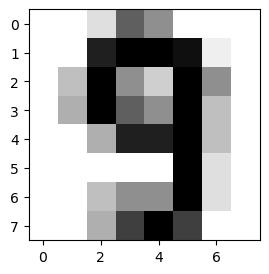

In [4]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [5]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.9) 

In [6]:
# data preparation
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# train and predict the voting ensemble
from sklearn.metrics import accuracy_score

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

voting Accuracy: 0.879


In [8]:
# How do the single estimators perform?

for clf_name, clf in estimators:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("%3s Accuracy: %.3f" % (clf_name,accuracy_score(y_test , y_pred)))

 LR Accuracy: 0.899
kNN Accuracy: 0.886
 DT Accuracy: 0.682


In [9]:
# --->>> Your Turn <<<---
#
# a) Experiment with soft and hard voting
# 
# b) Consider this quote from the documentation: 
# "In the cases of a tie, the VotingClassifier will select the class based on the ascending sort order.
# E.g., in the following scenario
#
#    classifier 1 -> class 2
#    classifier 2 -> class 1
#
# the class label 1 will be assigned to the sample."
# What do you conclude from this?

# Bagging Meta Classifier

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# --->>> Your Turn <<<---
# Try to build a bagging classifier using kNN as base learner

# Stacking Meta Classifier

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import CategoricalNB

# --->>> Your Turn <<<---
# Try to build a stacking classifier using kNN as base learner